In [1]:
import numpy as np
from scipy.stats import mode

class KNNClassifier:
    def euclidean(self,v1,v2):
        dist = np.sqrt(np.sum((v1-v2)**2))
        return dist
    
    def fit(self,X_train,Y_train):
        self.X_train = np.array(X_train)
        self.Y_train = np.array(Y_train)

    def predict(self,X_test,k=3):
        predicted_outcomes = []
        for v2 in X_test:
            distances = np.array([self.euclidean(v1,v2) for v1 in self.X_train])
            dist = np.argsort(distances)[:k]
            labels = np.array([self.Y_train[a] for a in dist])
            label = mode(labels,keepdims=False)[0]
            predicted_outcomes.append(label)
        return predicted_outcomes   
    

In [2]:
import pandas as pd
ds = pd.read_csv("diabetes.csv")
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0


In [3]:
ds.dropna()
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0


In [4]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
ds = ds.apply(label.fit_transform)
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,22,28,0,123,350,29,1
1,1,23,19,22,0,62,196,10,0
2,8,121,17,0,0,30,368,11,1
3,1,27,19,16,62,77,53,0,0
4,17,75,4,28,102,209,514,52,1


In [5]:
a = ds
X = a.drop('Outcome',axis = 1).values
y = ds['Outcome'].values

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [7]:
knn = KNNClassifier()
knn.fit(X_train,y_train)

In [8]:
y_pred=knn.predict(X_test)

<Axes: >

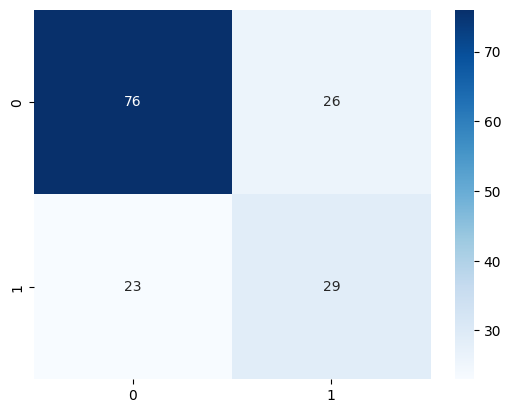

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
sns.heatmap(confusion_matrix(y_pred,y_test),annot = True,cmap = "Blues")

In [12]:
accuracy_scores = []
for k in range(1,20):
    predicted_vals = knn.predict(np.array(X_test), k)
    accuracy = accuracy_score(y_test, predicted_vals)
    accuracy_scores.append(accuracy)
    print("For k = {}\n".format(k), accuracy)


For k = 1
 0.6818181818181818
For k = 2
 0.6948051948051948
For k = 3
 0.6818181818181818
For k = 4
 0.6688311688311688
For k = 5
 0.6623376623376623
For k = 6
 0.6883116883116883
For k = 7
 0.7142857142857143
For k = 8
 0.7662337662337663
For k = 9
 0.7532467532467533
For k = 10
 0.7532467532467533
For k = 11
 0.7207792207792207
For k = 12
 0.7272727272727273
For k = 13
 0.7467532467532467
For k = 14
 0.7532467532467533
For k = 15
 0.7467532467532467
For k = 16
 0.7532467532467533
For k = 17
 0.7597402597402597
For k = 18
 0.7402597402597403
For k = 19
 0.7467532467532467


Text(0, 0.5, 'Accuracy')

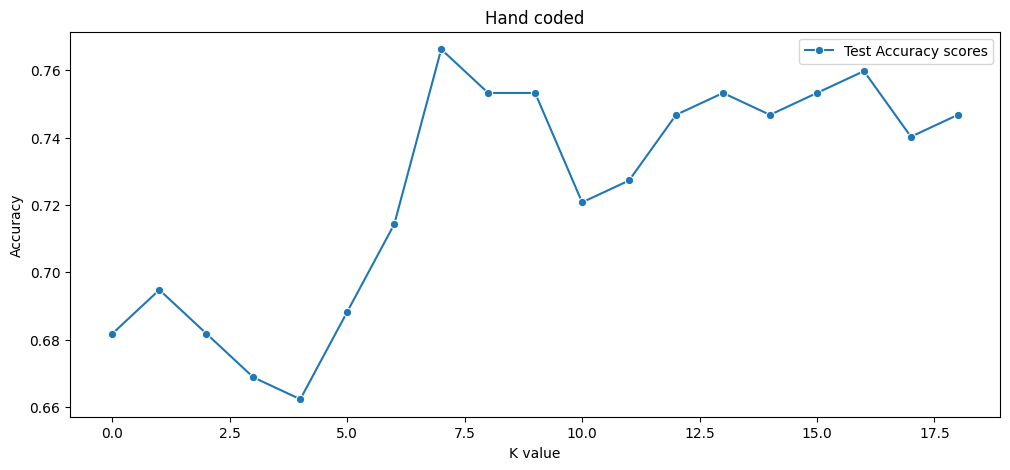

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.lineplot(accuracy_scores,marker='o',label='Test Accuracy scores')
plt.title("Hand coded")
plt.xlabel("K value")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

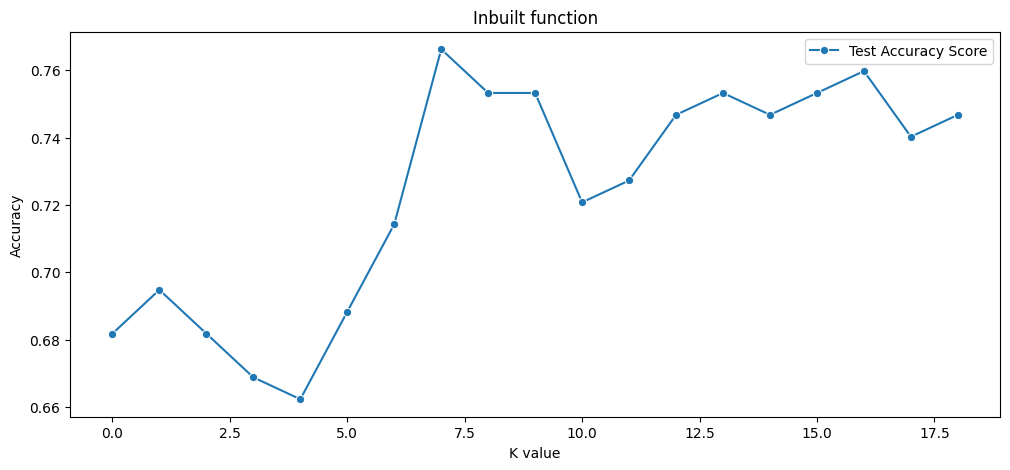

In [148]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_scores_inbuilt = []
for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    accuracy_scores_inbuilt.append(accuracy)
plt.figure(figsize=(12,5))
sns.lineplot(accuracy_scores_inbuilt,marker='o',label='Test Accuracy Score')
plt.title("Inbuilt function")
plt.xlabel("K value")
plt.ylabel("Accuracy")